In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
file_path = "side_effect_data 1.xlsx"
data = pd.read_excel(file_path)

data.shape

(2357, 19)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data.head(10)

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0
5,131,Male,1982-01-05,Turkiye,NaN,fluoxetine dr,2022-01-07,2022-03-19,Agizda Farkli Bir Tat,2022-02-04 08:08:31,NaN,"Diyabet, Hipertansiyon",NaN,"Alzheimer, Kalp Hastaliklari",Kanser,"Diyabet, Kemik Erimesi",AB RH-,66.0,150.0
6,61,NaN,1997-01-10,Turkiye,Mersin,carbamazepine extended release,2022-01-05,2022-03-07,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Bugday,"KOAH, Diyabet","Kalp Hastaliklari, Kan Hastaliklari",NaN,"Kan Hastaliklari, Hipertansiyon","KOAH, Kalp Hastaliklari",NaN,NaN,147.0
7,95,NaN,1997-01-15,Turkiye,Antalya,thiothixene,2022-01-10,2022-03-07,Deride Morarma,2022-02-09 20:53:54,Ispanak,"Astim, Diyabet","Alzheimer, Diyabet",KOAH,"Guatr, Kan Hastaliklari","Guatr, Kan Hastaliklari",B RH+,96.0,162.0
8,3,Female,1973-08-05,Turkiye,NaN,"asenapine tablet, sublingual",2022-01-08,2022-03-17,Bas Agrisi,2022-02-19 04:14:26,Laktoz,NaN,"Kan Hastaliklari, Diger","Kanser, Guatr","Alzheimer, Hipertansiyon","Kanser, Kalp Hastaliklari",0 RH-,91.0,NaN
9,53,NaN,1941-10-16,Turkiye,Adana,fluphenazine hcl elixir,2022-01-10,2022-03-13,Gormede Bulaniklik,2022-02-09 01:16:50,Elma,"Kemik Erimesi, KOAH",Hipertansiyon,"KOAH, Alzheimer","KOAH, Alzheimer","Astim, Kan Hastaliklari",0 RH-,107.0,156.0


In [5]:
data.tail()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
2352,9,NaN,1957-01-04,Turkiye,NaN,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,Ispanakgiller,NaN,,"Astim, Guatr",,"KOAH, Kan Hastaliklari",NaN,50.0,152.0
2353,101,Female,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Istiridye,NaN,"Hipertansiyon, Astim","Astim, Kemik Erimesi","KOAH, Kan Hastaliklari","Astim, Diyabet",AB RH-,NaN,178.0
2354,127,Female,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,Deniz Urunler,"Guatr, KOAH","Alzheimer, Diger",NaN,"Astim, Diyabet","Kalp Hastaliklari, Diger",B RH+,90.0,203.0
2355,178,Male,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,Sari Kantaron,"Alzheimer, Diger",NaN,"Kalp Hastaliklari, Diger","Kanser, KOAH","Astim, KOAH",NaN,90.0,184.0
2356,174,Female,1986-11-07,Turkiye,Istanbul,valproic acid,2022-01-06,2022-03-06,Istah Artisi,2022-02-17 07:08:01,NaN,"Alzheimer, Diger","Kanser, Diger","Hipertansiyon, Kan Hastaliklari",,"Hipertansiyon, Diger",AB RH+,79.0,175.0


In [6]:
#check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [7]:
data.isna().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [8]:
def print_null_data(data):
    null_count = data.isna().sum()
    null_percent = data.isna().sum() / len(data)
    null_percent = null_percent.apply(lambda x: f"{x:.1%}")
    print("Duplicated total data:", data.duplicated().sum())
    result = pd.concat([null_count, null_percent], axis=1)
    result.columns = ['Null Data Count', 'Null Percentage Data']
    return result
print_null_data(data)

Duplicated total data: 0


,Null Data Count,Null Percentage Data
Kullanici_id,0,0.0%
Cinsiyet,778,33.0%
Dogum_Tarihi,0,0.0%
Uyruk,0,0.0%
Il,227,9.6%
Ilac_Adi,0,0.0%
Ilac_Baslangic_Tarihi,0,0.0%
Ilac_Bitis_Tarihi,0,0.0%
Yan_Etki,0,0.0%
Yan_Etki_Bildirim_Tarihi,0,0.0%


## Handling Missing Values

In [9]:
from sklearn.impute import SimpleImputer, KNNImputer

num_imputer = SimpleImputer(strategy='mean')
data['Kilo'] = num_imputer.fit_transform(data[['Kilo']])
data['Boy'] = num_imputer.fit_transform(data[['Boy']])

In [10]:
categorical_columns = ['Cinsiyet', 'Il', 'Alerjilerim', 'Kronik Hastaliklarim', 
                       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari', 
                       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu']
data[categorical_columns] = data[categorical_columns].fillna('Bilinmeyen')

In [11]:
data.isna().sum()

Kullanici_id                        0
Cinsiyet                            0
Dogum_Tarihi                        0
Uyruk                               0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64

In [12]:
# Calculating Age
data['Age'] = 2024 - pd.to_datetime(data['Dogum_Tarihi']).dt.year

In [13]:
# Calculating Drug Usage Duration
data['Ilac_Baslangic_Tarihi'] = pd.to_datetime(data['Ilac_Baslangic_Tarihi'])
data['Ilac_Bitis_Tarihi'] = pd.to_datetime(data['Ilac_Bitis_Tarihi'])
data['Drug_Duration'] = (data['Ilac_Bitis_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days

# Data Visualization

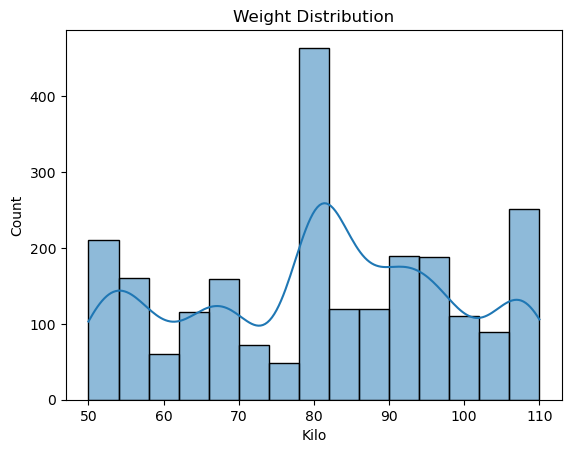

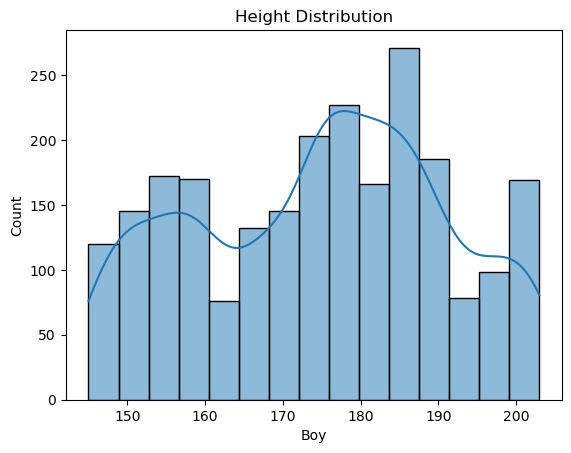

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of weight (Kilo)
sns.histplot(data['Kilo'].dropna(), kde=True)
plt.title('Weight Distribution')
plt.show()

# Plot distribution of height (Boy)
sns.histplot(data['Boy'].dropna(), kde=True)
plt.title('Height Distribution')
plt.show()

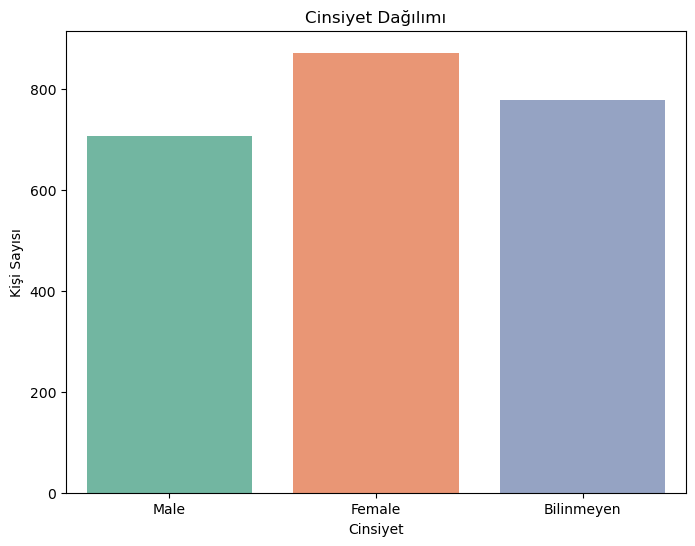

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cinsiyet', data=data, palette='Set2')
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.show()

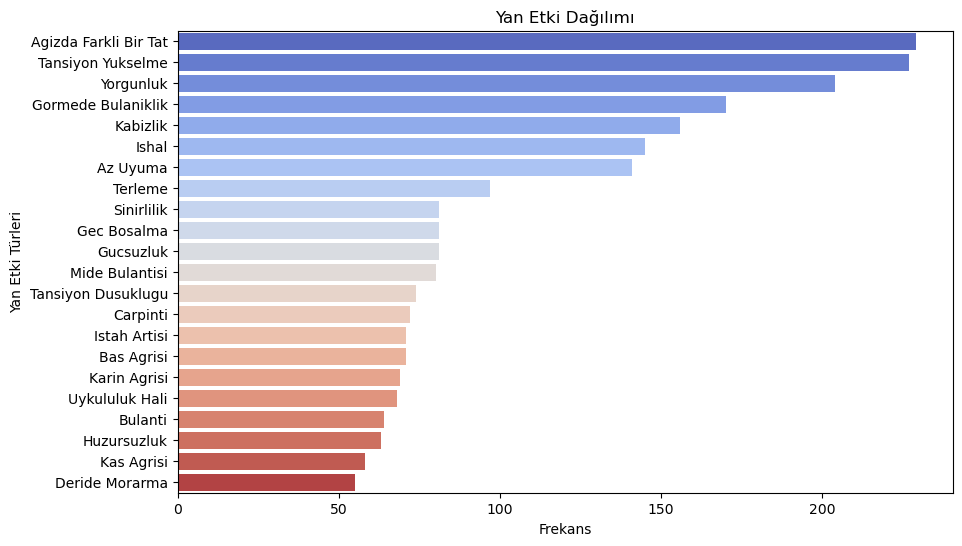

In [16]:
# Yan Etki dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(y='Yan_Etki', data=data, order=data['Yan_Etki'].value_counts().index, palette='coolwarm')
plt.title('Yan Etki Dağılımı')
plt.xlabel('Frekans')
plt.ylabel('Yan Etki Türleri')
plt.show()

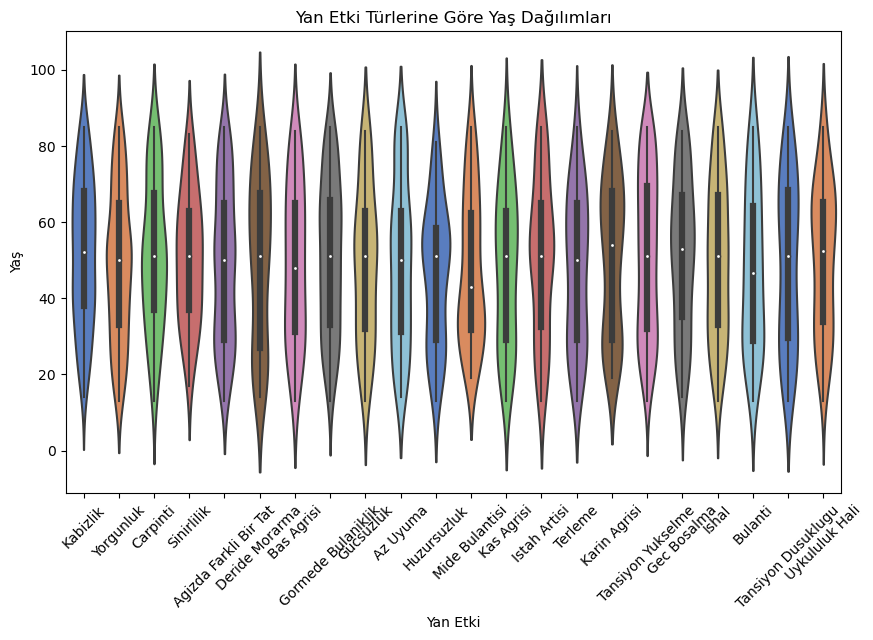

In [17]:
# Yan etki türlerine göre yaş dağılımı
plt.figure(figsize=(10, 6))
sns.violinplot(x='Yan_Etki', y='Age', data=data, palette='muted')
plt.title('Yan Etki Türlerine Göre Yaş Dağılımları')
plt.xticks(rotation=45)
plt.xlabel('Yan Etki')
plt.ylabel('Yaş')
plt.show()


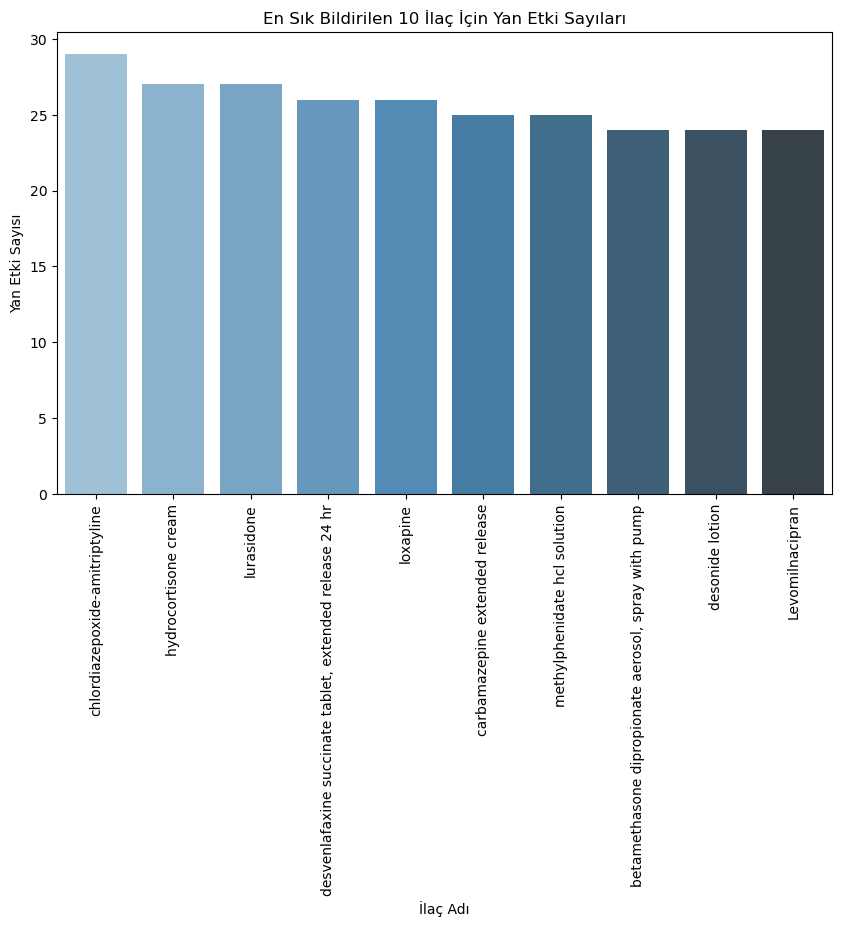

In [18]:
drug_side_effect_count = data.groupby('Ilac_Adi')['Yan_Etki'].count().sort_values(ascending=False)
top_10_drugs = drug_side_effect_count.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_drugs.index, y=top_10_drugs.values, palette="Blues_d")
plt.title('En Sık Bildirilen 10 İlaç İçin Yan Etki Sayıları')
plt.xlabel('İlaç Adı')
plt.ylabel('Yan Etki Sayısı')
plt.xticks(rotation=90)
plt.show()

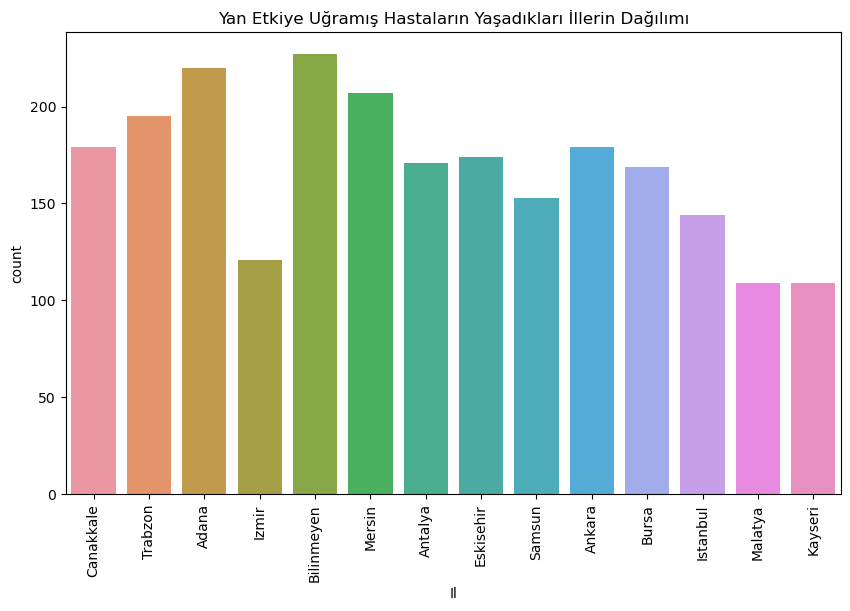

In [19]:
# Yan etkiye uğramış hastaların yaşadıkları illerin dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='Il', data=data)
plt.title('Yan Etkiye Uğramış Hastaların Yaşadıkları İllerin Dağılımı')
plt.xticks(rotation=90)
plt.show()


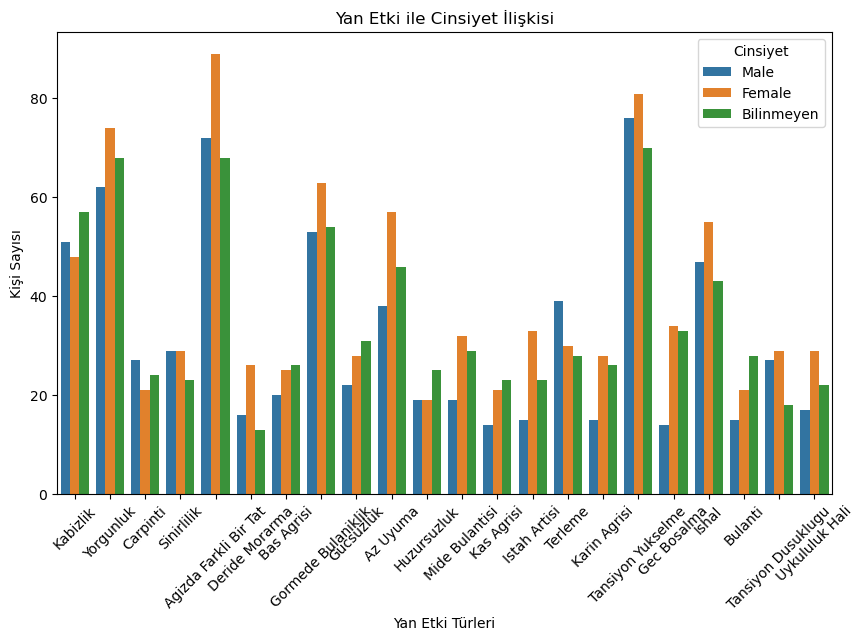

In [20]:
# Yan etki ve cinsiyet ilişkisinin görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.countplot(x='Yan_Etki', hue='Cinsiyet', data=data)
plt.title('Yan Etki ile Cinsiyet İlişkisi')
plt.xlabel('Yan Etki Türleri')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.show()


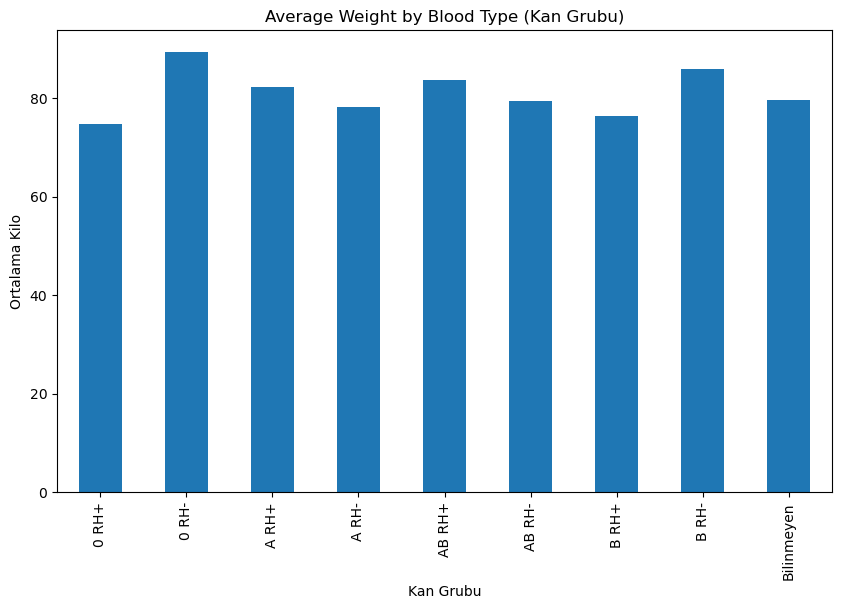

In [21]:
# Average Weight by Blood Type (Kan Grubu)
avg_weight_by_blood_type = data.groupby('Kan Grubu')['Kilo'].mean()
plt.figure(figsize=(10, 6))
avg_weight_by_blood_type.plot(kind='bar')
plt.title('Average Weight by Blood Type (Kan Grubu)')
plt.ylabel('Ortalama Kilo')
plt.show()


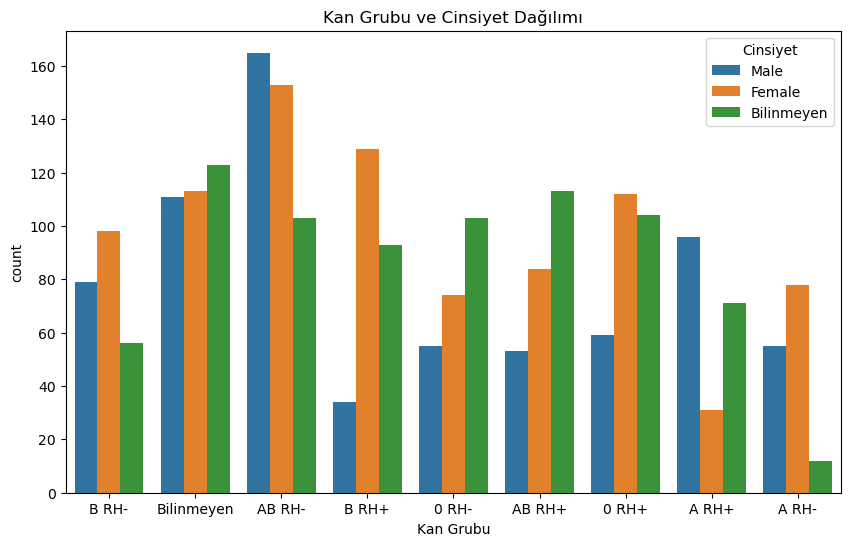

In [22]:
# Kan Grubu ve Cinsiyet Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='Kan Grubu', hue='Cinsiyet', data=data)
plt.title('Kan Grubu ve Cinsiyet Dağılımı')
plt.show()


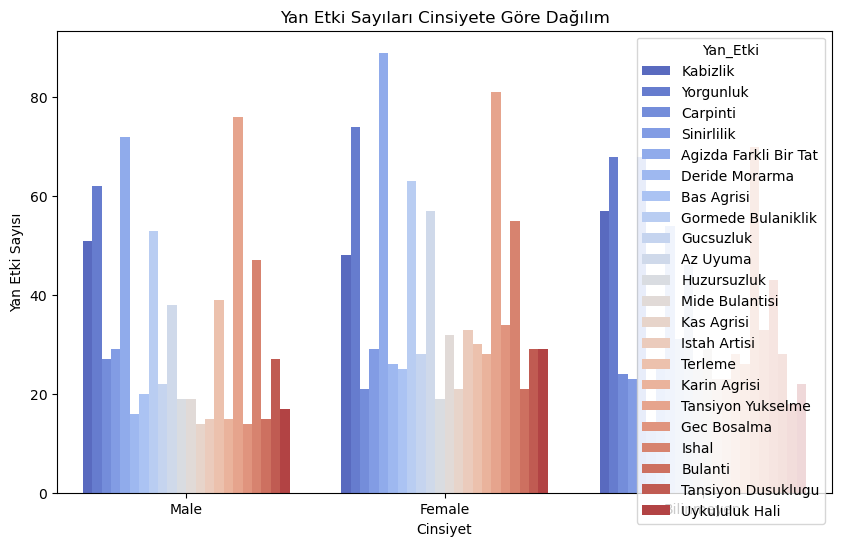

In [23]:
# Count of Yan_Etki (Side Effects) by Cinsiyet (Gender)
plt.figure(figsize=(10, 6))
sns.countplot(x='Cinsiyet', hue='Yan_Etki', data=data, palette='coolwarm')
plt.title('Yan Etki Sayıları Cinsiyete Göre Dağılım')
plt.xlabel('Cinsiyet')
plt.ylabel('Yan Etki Sayısı')
plt.show()


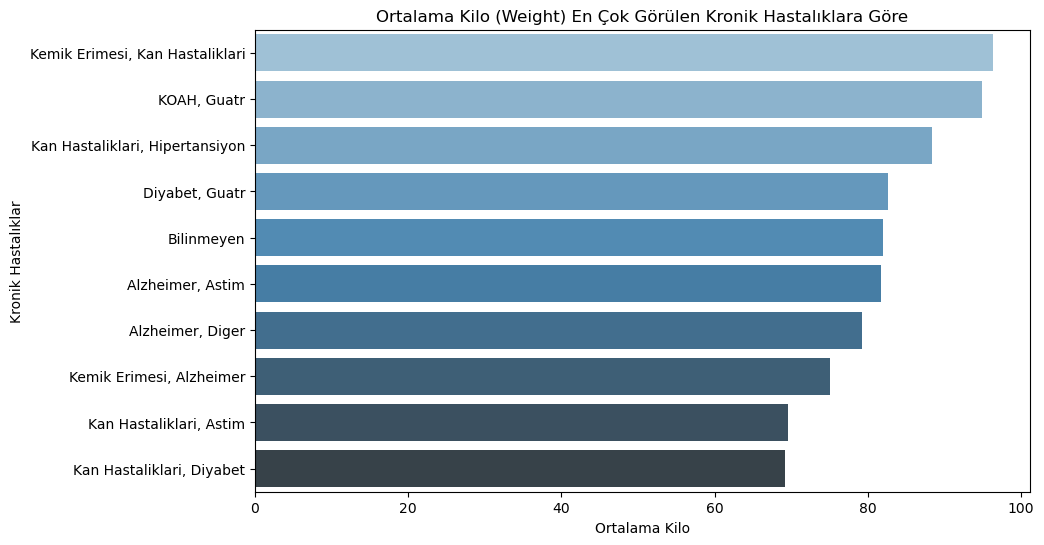

In [24]:

top_n = 10
top_chronic = data['Kronik Hastaliklarim'].value_counts().index[:top_n]

filtered_data = data[data['Kronik Hastaliklarim'].isin(top_chronic)]

avg_weight_by_chronic = filtered_data.groupby('Kronik Hastaliklarim')['Kilo'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_weight_by_chronic.values, y=avg_weight_by_chronic.index, palette="Blues_d")
plt.title('Ortalama Kilo (Weight) En Çok Görülen Kronik Hastalıklara Göre')
plt.xlabel('Ortalama Kilo')
plt.ylabel('Kronik Hastalıklar')
plt.show()

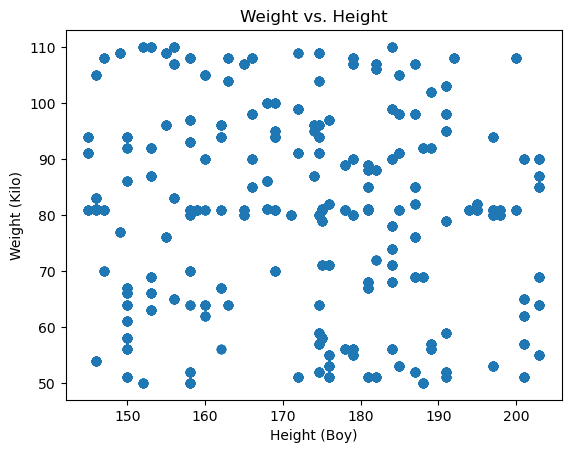

In [25]:
# Plotting weight against height
plt.scatter(data['Boy'], data['Kilo'])
plt.xlabel('Height (Boy)')
plt.ylabel('Weight (Kilo)')
plt.title('Weight vs. Height')
plt.show()

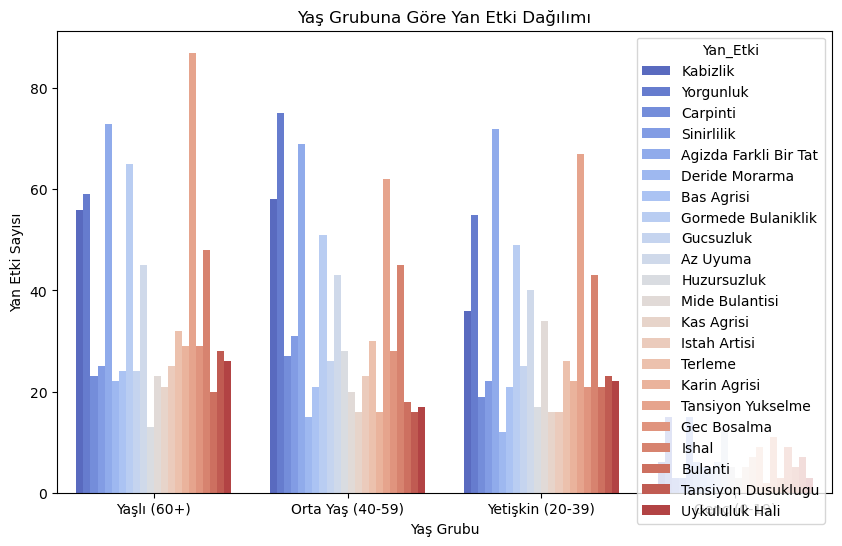

In [26]:
# Yaş Grubuna Göre Dağılım
def categorize_age(age):
    if age < 20:
        return 'Genç (0-19)'
    elif 20 <= age < 40:
        return 'Yetişkin (20-39)'
    elif 40 <= age < 60:
        return 'Orta Yaş (40-59)'
    else:
        return 'Yaşlı (60+)'

# Yeni yaş grubu kolonu ekleme
data['Yas_Grubu'] = data['Age'].apply(categorize_age)

# Yaş Grubuna Göre Yan Etki Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='Yas_Grubu', hue='Yan_Etki', data=data, palette='coolwarm')
plt.title('Yaş Grubuna Göre Yan Etki Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Yan Etki Sayısı')
plt.show()

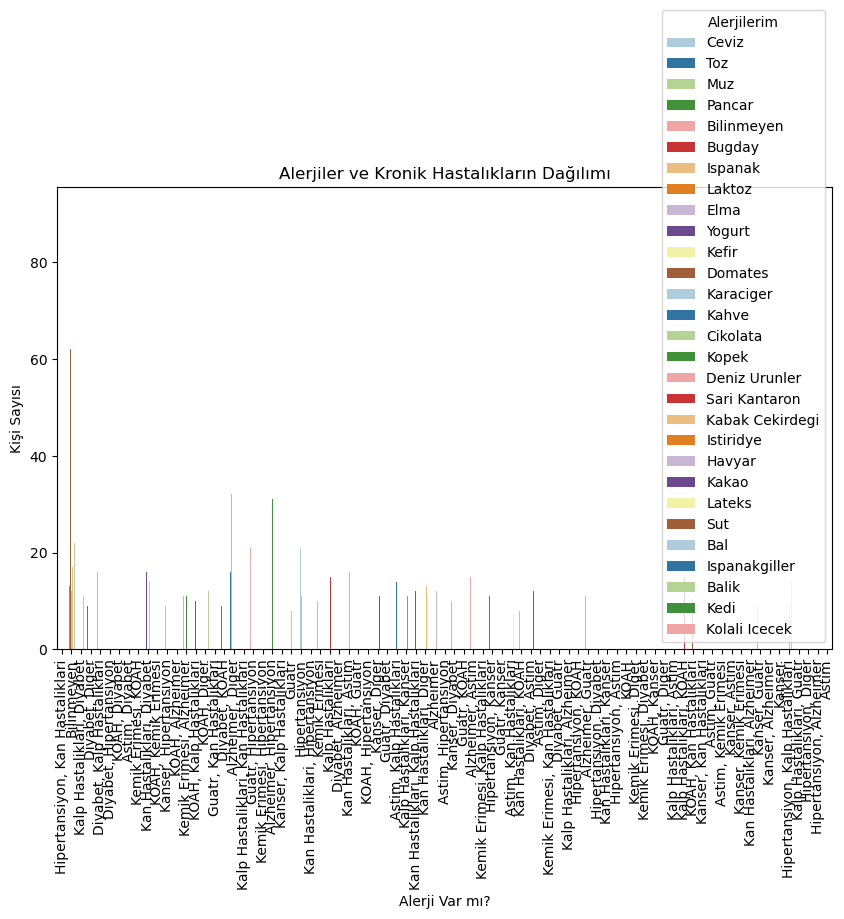

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Kronik Hastaliklarim', hue='Alerjilerim', data=data, palette='Paired')
plt.title('Alerjiler ve Kronik Hastalıkların Dağılımı')
plt.xlabel('Alerji Var mı?')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=90)
plt.show()

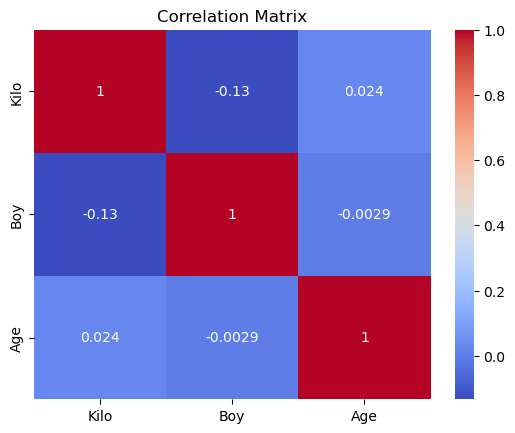

In [28]:
# Correlation matrix
correlation_matrix = data[['Kilo', 'Boy', 'Age']].corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Label Encoding 'Cinsiyet'
label_encoder = LabelEncoder()
data['Cinsiyet'] = label_encoder.fit_transform(data['Cinsiyet'])

In [30]:
# OneHot Encoding 'Kan Grubu' and other categorical variables
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_columns = one_hot_encoder.fit_transform(data[['Kan Grubu']])
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(['Kan Grubu']))
data = pd.concat([data, encoded_df], axis=1)
data.drop('Kan Grubu', axis=1, inplace=True)

In [31]:
scaler = StandardScaler()
scaled_columns = ['Kilo', 'Boy', 'Age', 'Drug_Duration']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])


In [32]:
X = data.drop('Yan_Etki', axis=1)
y = data['Yan_Etki']

In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
print("Data Pre-processing and EDA Completed!")

Data Pre-processing and EDA Completed!
